In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from pycaret.classification import *



ModuleNotFoundError: No module named 'pycaret'

In [4]:
# ! pip install scipy==1.6
# ! pip install spacy==3.4.0
# ! pip install numpy==1.21
# ! pip install pycaret

In [ ]:
# import iris dataset
df = datasets.load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[df['data'], df['target']],
                     columns= df['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# split the data into train and test sets
train, test= train_test_split(df,
                                    test_size= 0.25,
                                    shuffle= True,
                                    random_state= 42)



In [ ]:
clf1 = setup(data = train, 
             target = "target",
             silent = True,
             remove_outliers = True,
             feature_selection = True)

,Description,Value
0,session_id,2809
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(112, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models(exclude=['xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9875,0.9900,0.9889,0.9906,0.9871,0.9810,0.9830,0.0030
lda,Linear Discriminant Analysis,0.9464,0.9850,0.9500,0.9610,0.9444,0.9181,0.9273,0.0030
lr,Logistic Regression,0.9339,0.9850,0.9444,0.9466,0.9336,0.9004,0.9074,0.2370
nb,Naive Bayes,0.9339,0.9850,0.9444,0.9466,0.9336,0.9004,0.9074,0.0030
knn,K Neighbors Classifier,0.9321,0.9875,0.9389,0.9515,0.9301,0.8969,0.9086,0.1040
gbc,Gradient Boosting Classifier,0.9196,0.9536,0.9278,0.9359,0.9179,0.8779,0.8875,0.0300
catboost,CatBoost Classifier,0.9071,0.9900,0.9167,0.9202,0.9058,0.8588,0.8665,0.4150
rf,Random Forest Classifier,0.9054,0.9862,0.9111,0.9251,0.9023,0.8553,0.8677,0.0360
lightgbm,Light Gradient Boosting Machine,0.9054,0.9850,0.9111,0.9251,0.9023,0.8553,0.8677,0.0090
et,Extra Trees Classifier,0.8929,0.9838,0.9000,0.9095,0.8901,0.8362,0.8467,0.0320


In [ ]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8750,0.9000,0.8889,0.9062,0.8714,0.8095,0.8295
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


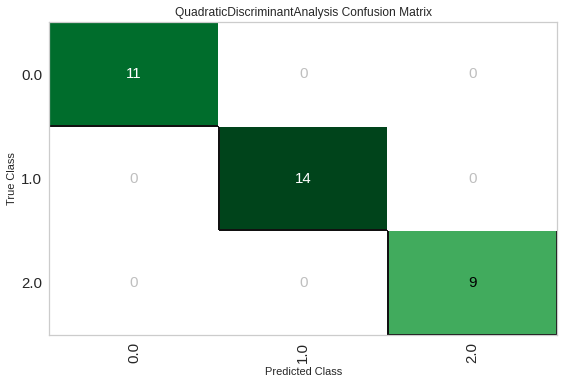

In [ ]:
plot_model(qda, plot = 'confusion_matrix')


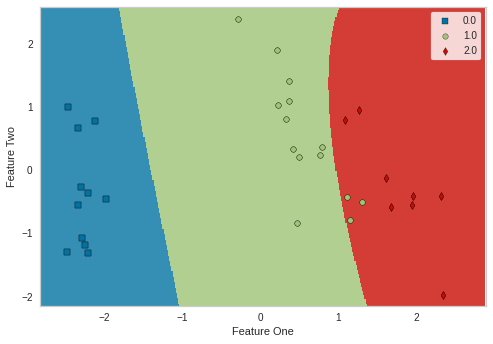

In [ ]:
plot_model(qda, plot='boundary')

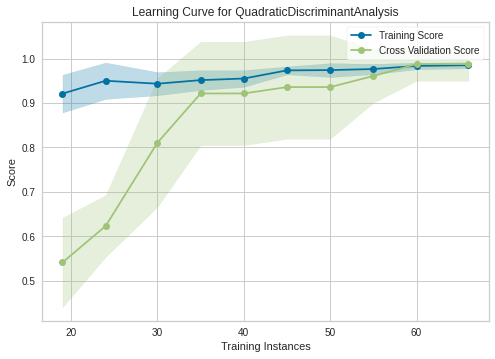

In [ ]:
plot_model(estimator = qda, plot = 'learning')

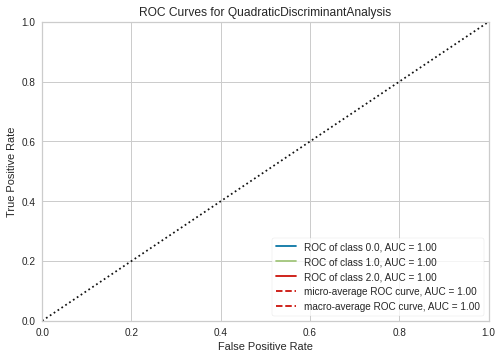

In [ ]:
plot_model(estimator = qda, plot = 'auc')

## Retrain a new model for further testing

In [ ]:
from sklearn.model_selection import train_test_split


X=df.drop('target', axis=1)  
y=df['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


rfc=RandomForestClassifier(random_state=42)


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, verbose=1, cv= 3, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
# # Get the best hyperparameters
# best_rf = CV_rfc.best_estimator_

best_rf=RandomForestClassifier(
    random_state=42, max_features='auto', 
    n_estimators= 200, max_depth=4, criterion='gini')

best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = best_rf.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest on CV data:  1.0


In [ ]:
import joblib


# save the model to disk
filename = 'rf.sav'
joblib.dump(best_rf, filename)

['rf.sav']

In [ ]:
import joblib

# load the model from disk
filename = 'rf.sav'

loaded_model = joblib.load(filename)
# result = loaded_model.predict(test.drop('target', axis=1).iloc[0].values.reshape(1, -1))
# result

In [ ]:
import pandas as pd

result = loaded_model.predict(np.array([5., 2., 3., 4.]))
result

ValueError: Expected 2D array, got 1D array instead:
array=[5. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
test.iloc[0].values

array([6.1, 2.8, 4.7, 1.2, 1. ])